In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DataDwarf = pd.read_excel('PAR_Dwarf.xlsx')
DataTall = pd.read_excel('PAR_Tall.xlsx')

In [3]:
for i in DataDwarf.index:
    DataDwarf.loc[i,'DateTime'] = datetime.datetime.strptime(str(DataDwarf.loc[i,'year'])+ ' ' +
                                                        str(DataDwarf.loc[i,'day'])+ ' ' +
                                                        str(DataDwarf.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')
    if DataDwarf.loc[i,'day'] < 172:
        DataDwarf.loc[i,'DaysSinceWinterSolstice'] =  DataDwarf.loc[i,'day'] + 172
    else:
        DataDwarf.loc[i,'DaysSinceWinterSolstice'] = DataDwarf.loc[i,'day'] - 172

In [4]:
for i in DataTall.index:
    DataTall.loc[i,'DateTime'] = datetime.datetime.strptime(str(DataTall.loc[i,'year'])+ ' ' +
                                                        str(DataTall.loc[i,'day'])+ ' ' +
                                                        str(DataTall.loc[i,'hhmm']).zfill(4),'%Y %j %H%M')
    if DataTall.loc[i,'day'] < 172:
        DataTall.loc[i,'DaysSinceWinterSolstice'] =  DataTall.loc[i,'day'] + 172
    else:
        DataTall.loc[i,'DaysSinceWinterSolstice'] = DataTall.loc[i,'day'] - 172

In [5]:
DataDwarf.set_index('DateTime',inplace=True)
DataTall.set_index('DateTime',inplace=True)

In [6]:
DataDwarf.drop(columns=['year','day','hhmm','Tlogger','Vbatt'],inplace=True)
DataDwarf.where(DataDwarf < 3000,other=np.nan,inplace=True)
DataDwarf.where(DataDwarf > 2,other=np.nan,inplace=True)
DataDwarf.sort_index(inplace=True)

In [7]:
DataTall.drop(columns=['year','day','hhmm','Tlogger','Vbatt'],inplace=True)
DataTall.where(DataTall < 3000,other=np.nan,inplace=True)
DataTall.where(DataTall > 2,other=np.nan,inplace=True)
DataTall.sort_index(inplace=True)


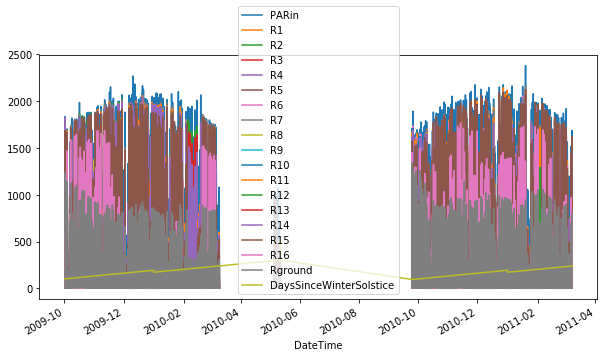

In [8]:
DataDwarf.plot(figsize=(10,5))

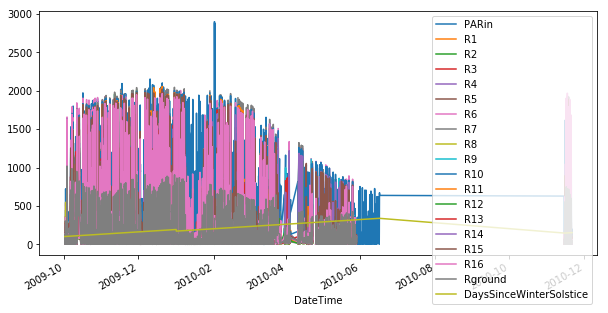

In [9]:
DataTall.plot(figsize=(10,5))

In [10]:
def SumfullDays(x):
    if x.count() > 16:
        return x.sum()
    else:
        return np.nan
DwarfUnderCanopy = DataDwarf.loc[:,'R1':'R16'].mean(axis=1).resample('d').apply(SumfullDays)
DwarfIncident = DataDwarf.loc[:,'PARin'].resample('d').apply(SumfullDays)
DwarfRadInt = 1-(DwarfUnderCanopy/DwarfIncident)
DwarfRadInt.where(DwarfRadInt>0,np.nan,inplace=True)
DwarfRadInt.name = 'DwarfRadInt'
DwarfDaySinceWinterSolstice = DataDwarf.loc[:,'DaysSinceWinterSolstice'].resample('d').mean()

In [11]:
TallUnderCanopy = DataTall.loc[:,'R1':'R16'].mean(axis=1).resample('d').apply(SumfullDays)
TallIncident = DataTall.loc[:,'PARin'].resample('d').apply(SumfullDays)
TallRadInt = 1-(TallUnderCanopy/TallIncident)
TallRadInt.where(TallRadInt>0,np.nan,inplace=True)
TallRadInt.name = 'TallRadInt'
TallDaySinceWinterSolstice = DataTall.loc[:,'DaysSinceWinterSolstice'].resample('d').mean()

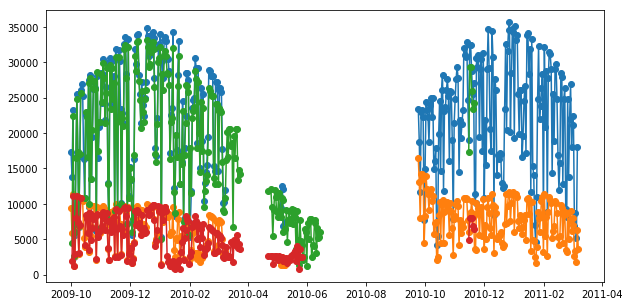

In [12]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(DwarfIncident,'-o')
plt.plot(DwarfUnderCanopy,'-o')
plt.plot(TallIncident,'-o')
plt.plot(TallUnderCanopy,'-o')

In [18]:
DwarfRadIntDF = pd.DataFrame(index = DwarfRadInt.index,
                             data=np.transpose([DwarfDaySinceWinterSolstice,DwarfRadInt]),
                             columns = ['DaySinceWinterSolstice','RadInt'])
TallRadIntDF = pd.DataFrame(index = TallRadInt.index,
                             data=np.transpose([TallDaySinceWinterSolstice,TallRadInt]),
                             columns = ['DaySinceWinterSolstice','RadInt'])
RadIntDF = pd.concat([DwarfRadIntDF,TallRadIntDF],keys=['Dwarf','Tall'],names=['Crop'])
RadIntDF.loc[:,'RadInt'] = RadIntDF.loc[:,'RadInt'].where(RadIntDF.loc[:,'RadInt']<0.8,np.nan)

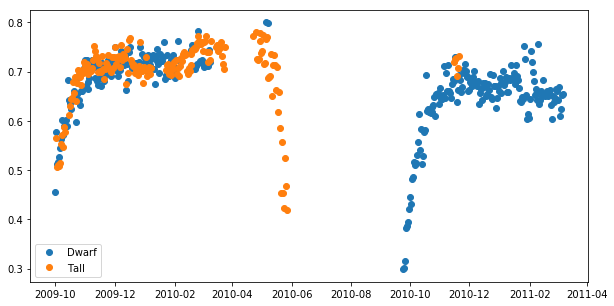

In [14]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(RadIntDF.loc['Dwarf','RadInt'],'o',label='Dwarf')
plt.plot(RadIntDF.loc['Tall','RadInt'],'o',label='Tall')
plt.legend()

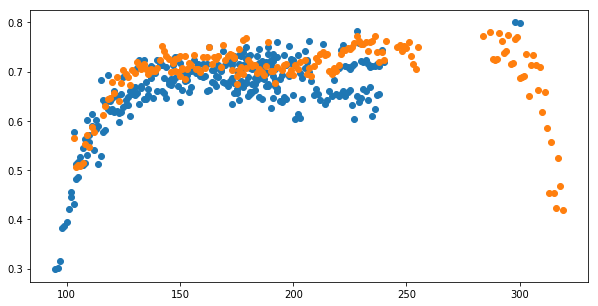

In [15]:
Figure = plt.figure(figsize=(10,5))
Ax = Figure.add_subplot(1,1,1)
plt.plot(RadIntDF.loc['Dwarf','DaySinceWinterSolstice'],
         RadIntDF.loc['Dwarf','RadInt'],'o')
plt.plot(RadIntDF.loc['Tall','DaySinceWinterSolstice'],
         RadIntDF.loc['Tall','RadInt'],'o')


In [20]:
RadIntDF.to_pickle('RadInt.pkl')